In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
import numpy as np

from plot_helpers import load_results, sup_label, _load_results_helper

# customizations
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

plt.style.use('tableau-colorblind10')

In [11]:
# omit Am242_m1, Cm242, Cm245, Cm246
actinides = [
    'Th232', 'Th233', 'Pa233', 'U233',
    'U234', 'U235', 'U236', 'U238', 'U239', 'Np239',
    'Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242',
    'Am241', 'Am242', #'Am242_m1',
    'Am243', 'Am244',
    #'Cm242', 'Cm243', 
    'Cm244', #'Cm245', 'Cm246',
]

# omit Cs133, Cs134, Mo97
fission_products = [
    'Kr85', 'Sr90', 'Y90', 'Zr93', 'Mo95', #'Mo97', 
    'Tc99', 'Ru101', 'Ru106',
    'Rh103', 'Pd105', 'Pd107', 'Ag109',  #'Cd113_m1', 'Sn121_m1', 
    'Sn126',
    'Te132', 'I129', 'I131', 'Xe131', 'Xe135', 
    #'Cs133', 'Cs134', 
    'Cs135', 'Cs137',
    'La139', 'Ce142', 'Nd143', 'Nd145', 'Pm147', 'Sm149', 'Sm151',
    'Eu155', 'Gd158',
]

In [12]:
def isotope_bar_plot(nuclides_dict, time, nuclides, filename, decimals=2, **kwargs):

    print(f'{filename}...')

    fig, ax = plt.subplots(**kwargs)
    burn_indices = (49, 98, 147, 196)
    #burn_indices = (13,14,15,16)
    burnup = time
    ind = np.arange(len(nuclides))
    height = 1/(len(burn_indices)+1)
    for i, index in enumerate(burn_indices):
        data_base = np.array([nuclides_dict[nuc][1][index] for nuc in nuclides])
        data_case = np.array([nuclides_dict[nuc][0][index] for nuc in nuclides])
        diff = np.zeros_like(data_case)
        nonzero = data_case > 0.0
        diff[nonzero] = (data_case[nonzero] - data_base[nonzero])/data_base[nonzero]
        ax.barh(ind + i*height, diff, height, label=f'{burnup[index]} days')

    locs = ind + height*(len(burn_indices)/2 - 0.5)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals))
    if decimals >= 3:
        ax.xaxis.set_tick_params(rotation=30)
    ax.set_xlabel('(OpenMC - Serpent)/Serpent')
    ax.set_yticks(locs)
    ax.set_yticklabels([sup_label(x) for x in nuclides])
    ax.set_ylim(locs[0] - 0.5, locs[-1] + 0.5)
    ax.invert_yaxis()
    ax.legend()
    ax.grid()    
    fname = f'{filename}'
    plt.savefig(f'{fname}.pdf')
    plt.close(fig)

In [13]:
nuclides_dict, time = load_results()
isotope_bar_plot(nuclides_dict, time, actinides, '../figs/ch5/actinides')
kwargs = {'figsize': (6.4, 10.0)}
isotope_bar_plot(nuclides_dict, time, fission_products, '../figs/ch5/fission_products', **kwargs)

../figs/ch5/actinides...
../figs/ch5/fission_products...


## Nuclide Investigations

In [139]:
_, openmc_nucs, time = _load_results_helper('openmc')
_, serpent_nucs, _ = _load_results_helper('serpent')

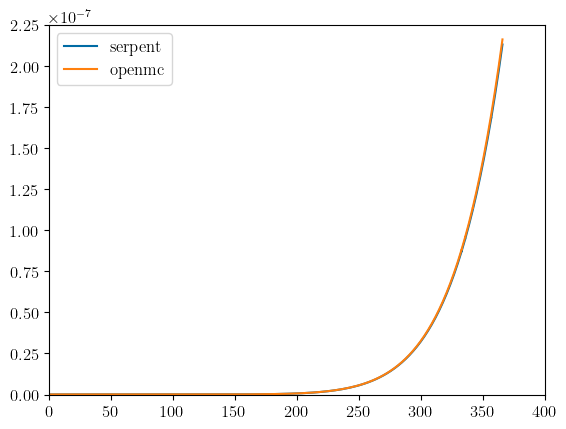

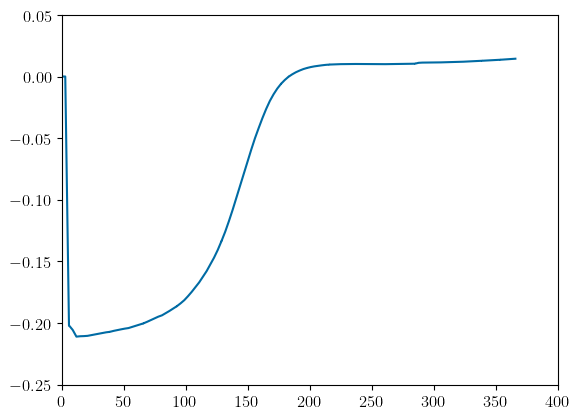

In [135]:
i=0
j = -1
nuc = 'Cm242'
fig, ax = plt.subplots()
ax.plot(time[i:j], serpent_nucs[nuc][i:j], label='serpent')
ax.plot(time[i:j], openmc_nucs[nuc][i:j], label='openmc')
ax.legend()

fig, ax = plt.subplots()
err = (openmc_nucs[nuc] - serpent_nucs[nuc]) / serpent_nucs[nuc]
for k in range(len(err)):
    if np.isnan(err[k]):
        err[k] = err[k-1]
ax.plot(time[i:j], err[i:j])

In [112]:
err[i:j]

array([], dtype=float64)

In [95]:
err

array([-9.46950549e-07, -1.66701646e-03,  0.00000000e+00, -9.90867695e-04,
        0.00000000e+00, -8.91090614e-04,  0.00000000e+00, -8.57478733e-04,
        0.00000000e+00, -8.41313305e-04,  0.00000000e+00, -8.31788670e-04,
        0.00000000e+00, -8.26047314e-04,  0.00000000e+00, -8.24512111e-04,
        0.00000000e+00, -8.22420402e-04,  0.00000000e+00, -8.21411590e-04,
        0.00000000e+00, -8.21737486e-04,  0.00000000e+00, -8.22720145e-04,
        0.00000000e+00, -8.22065053e-04,  0.00000000e+00, -8.18184501e-04,
        0.00000000e+00, -8.19530566e-04,  0.00000000e+00, -8.18779276e-04,
        0.00000000e+00, -8.19836344e-04,  0.00000000e+00, -8.18954707e-04,
        0.00000000e+00, -8.20866310e-04,  0.00000000e+00, -8.22307439e-04,
        0.00000000e+00, -8.21080448e-04,  0.00000000e+00, -8.22441940e-04,
        0.00000000e+00, -8.23399825e-04,  0.00000000e+00, -8.24895625e-04,
        0.00000000e+00, -8.24447688e-04,  0.00000000e+00, -8.26335243e-04,
        0.00000000e+00, -